In [104]:
import torch
import torch.nn as nn
import numpy as np 
import seaborn as sns

In [105]:
iris = sns.load_dataset('iris')

data = torch.tensor(iris[iris.columns[0:4]].values).float()

labels = torch.zeros(len(data),dtype=torch.long)
labels[iris.species=="versicolor"] = 1
labels[iris.species=="virginica"] = 2


In [106]:
propTraining = .8
nTraining = int(len(labels)*propTraining)

traintest = np.random.choice(range(len(labels)), nTraining, replace=False)
traintest

array([ 97,   0,   3,  18, 138,  34,  42,  74,  29,  26, 110,  62,  38,
        11,  39,  88,  35,  53, 121, 136,  82, 118,  49,  90,  69, 117,
        52, 133,  50, 101,  76, 128,  36, 107,   7, 129, 145,  58,  19,
        86,  59, 140,  95, 127,  44,  78,  48,  57,  15,  77,  72,   4,
       105,  73,  60, 149, 137,  75,  40,  20,  23, 102, 135,  63,  99,
       122,  21,  94,  66, 147,   2,  41, 134,  61,  92,  10,  56, 106,
         1,  46,  80, 120,   8,  96, 125,  17,  64,  43, 113,  68, 119,
       144, 115,  16, 123,  79, 142,  24,  30,  83,  47, 141,  25,  28,
       100,  71,  51,  87,   6, 109,  13, 146, 114, 126,  45, 103, 131,
        85,  14, 143])

In [107]:
torch.mean(labels[~traintest].float())

tensor(1.0083)

In [108]:
ann = nn.Sequential(
    nn.Linear(4,64),
    nn.ReLU(),
    nn.Linear(64,64),
    nn.ReLU(),
    nn.Linear(64,3),
)

lossfun = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(ann.parameters(), lr=.01)

In [109]:
print(data[traintest].shape)

torch.Size([120, 4])


In [110]:
losses = torch.zeros(1000)
allAcc = []
for i in range(1000):
    y_pred = ann(data[traintest])
    
    loss = lossfun(y_pred, labels[traintest])
    losses[i] = loss
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    matches = torch.argmax(y_pred, axis = 1) == labels[traintest]
    acc = 100*torch.mean(matches.float())
    allAcc.append(acc)
    acc
    
acc

tensor(98.3333)

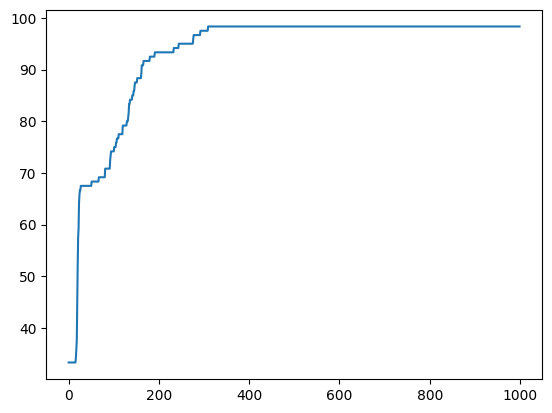

In [111]:
import matplotlib.pyplot as plt

plt.plot(allAcc)

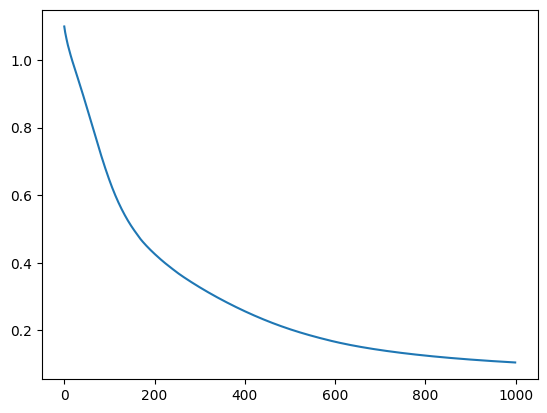

In [112]:
plt.plot(losses.detach())

In [113]:
pred = ann(data[~traintest])
print(acc)
print(100*torch.mean((torch.argmax(pred, axis=1) == labels[~traintest]).float()))

tensor(98.3333)
tensor(97.5000)


In [ ]:
from sklearn.model_selection import train_test_split

ann = nn.Sequential(
    nn.Linear(4,64),
    nn.ReLU(),
    nn.Linear(64,64),
    nn.ReLU(),
    nn.Linear(64,3),
)

lossfun = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(ann.parameters(), lr=.01)